In [50]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [51]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml("mnist_784",as_frame=True)


In [52]:
x = mnist.data
y = mnist.target

In [53]:
y = (y=='0').astype('int8')
y

0        0
1        1
2        0
3        0
4        0
        ..
69995    0
69996    0
69997    0
69998    0
69999    0
Name: class, Length: 70000, dtype: int8

In [54]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=7)

In [65]:
model = DecisionTreeClassifier(

)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12615
           1       0.92      0.92      0.92      1385

    accuracy                           0.98     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.98      0.98      0.98     14000



In [56]:
model = DecisionTreeClassifier(
    criterion= 'entropy'
)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12615
           1       0.95      0.95      0.95      1385

    accuracy                           0.99     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.99      0.99      0.99     14000



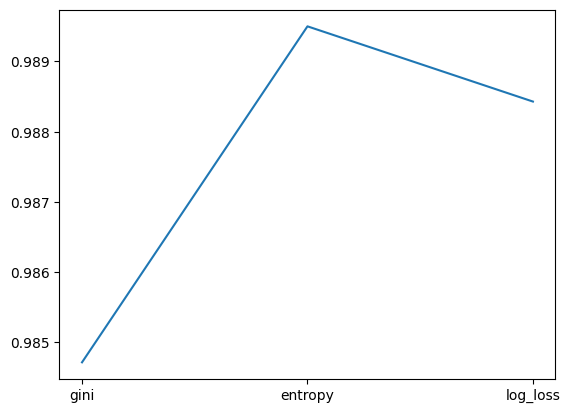

In [57]:
criterions = ['gini','entropy','log_loss']
accuracies = []
for crt in criterions:
    model = DecisionTreeClassifier(
    criterion= crt
    )
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    accuracies.append(accuracy_score(ytest, y_pred))
plt.plot(criterions, accuracies)
plt.show()

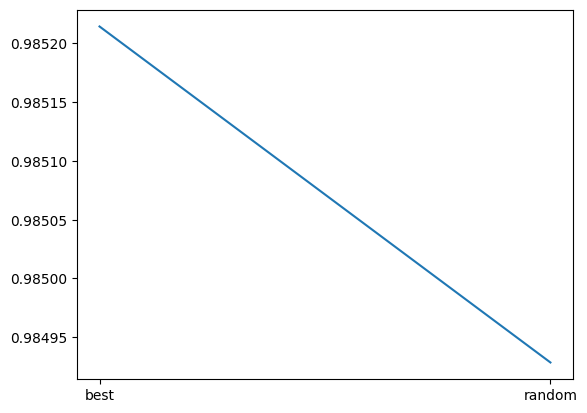

In [59]:
splitters = ['best','random']
accuracies = []
for splitter in splitters:
    model = DecisionTreeClassifier(
    splitter= splitter
    )
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    accuracies.append(accuracy_score(ytest, y_pred))
plt.plot(splitters, accuracies)
plt.show()

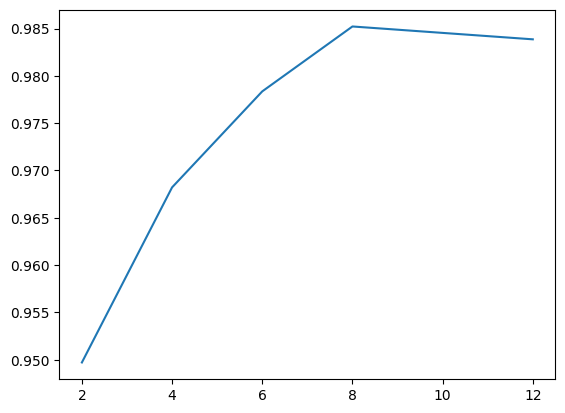

In [61]:
max_depths = [2,4,6,8,12]
accuracies = []
for depth in max_depths:
    model = DecisionTreeClassifier(
    max_depth= depth
    )
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    accuracies.append(accuracy_score(ytest, y_pred))
plt.plot(max_depths, accuracies)
plt.show()

In [67]:
best_model = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=8, 
    splitter='best',
    class_weight={1:12,0:1}
)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12615
           1       0.92      0.93      0.93      1385

    accuracy                           0.99     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.99      0.99      0.99     14000

